# Electric Vehicle Battery Charger

This electric vehicle battery charger (EVBC) test case is comprised of a full bridge rectifier, an interleaved boost, and an LLC.

![isolated_battery_charger](isolated_battery_charger.png)

This test case demonstrates SIMBA's ability to simulate circuits composed of multiple high frequency switching converters requiring very small time steps.  

### Reference

H. Chalangar, T. Ould-Bachir, K. Sheshyekani and J. Mahseredjian, "Methods for the Accurate Real-Time Simulation of High Frequency Power Converters," in IEEE Transactions on Industrial Electronics, doi: 10.1109/TIE.2021.3114706.

### Run Simulation 

In [3]:
import numpy as np
import os
import time
import matplotlib.pyplot as plt
from aesim.simba import ProjectRepository, License

In [4]:
# Load Simba project
project = ProjectRepository(os.path.join(os.getcwd(), "isolated_battery_charger.jsimba"))
mycvs = project.GetDesignByName('Design 1')

# Get the result object and solve the system
tic = time.process_time()
job = mycvs.TransientAnalysis.NewJob()
status = job.Run()
toc = time.process_time()
print('Elapsed time = ', toc - tic)
print('Number of points = ', np.shape(job.TimePoints)[0])

Elapsed time =  17.197747999999997
Number of points =  9763335


### PFC stage

In [5]:
# We'll keep only the first 2 period
index_2T = next(x[0] for x in enumerate(job.TimePoints) if x[1] > 2/60)
simba_time_2T = (job.TimePoints)[0:index_2T]

# Get results
simba_Cdc = job.GetSignalByName('Cdc - Voltage').DataPoints[0:index_2T]
simba_iL1 = job.GetSignalByName('L1 - Current').DataPoints[0:index_2T]
simba_iL2 = job.GetSignalByName('L2 - Current').DataPoints[0:index_2T]

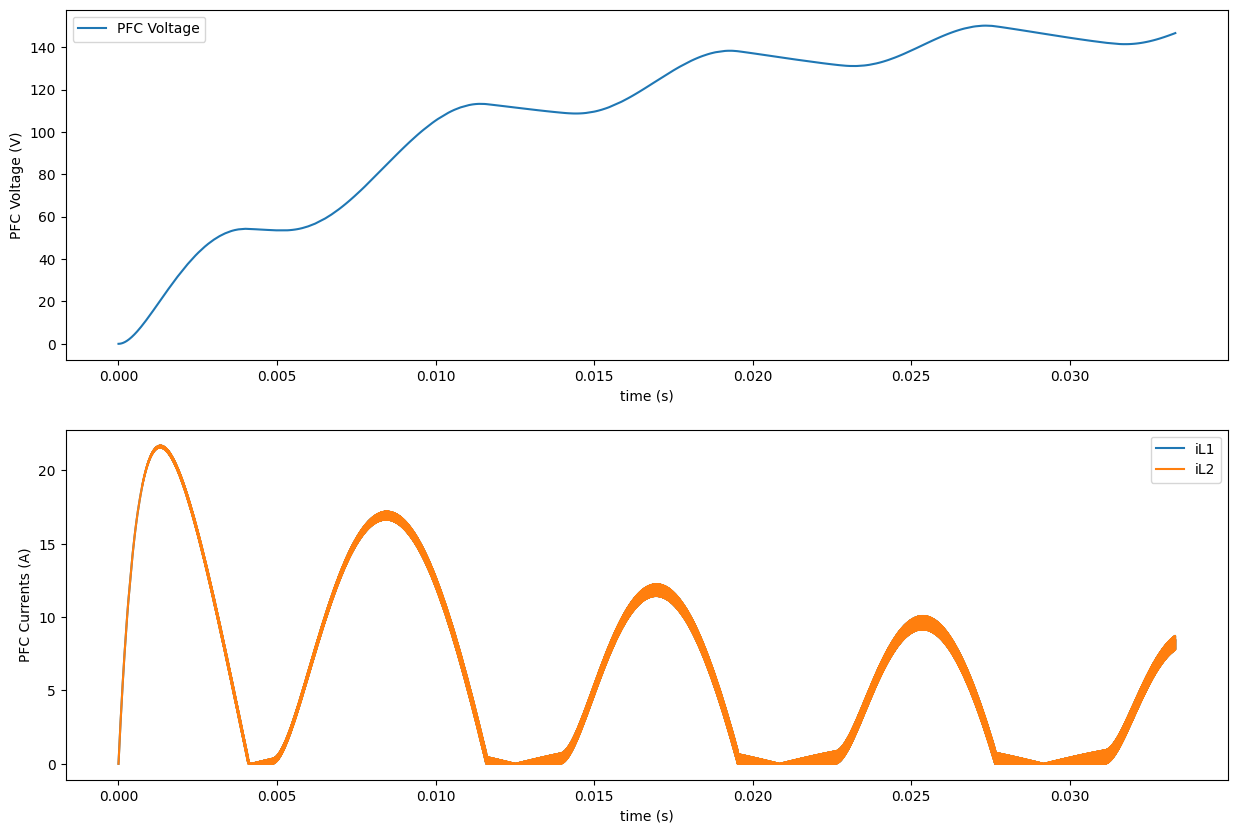

In [6]:
#plot
fig, axs = plt.subplots(2,1,figsize=(15,10))
axs[0].set_ylabel('PFC Voltage (V)')
axs[0].set_xlabel('time (s)')
axs[0].plot(simba_time_2T,simba_Cdc, label ='PFC Voltage')
axs[0].legend(loc='upper left')

axs[1].set_ylabel('PFC Currents (A)')
axs[1].set_xlabel('time (s)')
axs[1].plot(simba_time_2T,simba_iL1, label ='iL1')
axs[1].plot(simba_time_2T,simba_iL1, label ='iL2')
axs[1].legend(loc='upper right')

plt.show();

### LLC stage

In [7]:
# We'll keep only the point between 4.98ms and 5ms
index_4ms = next(x[0] for x in enumerate(job.TimePoints) if x[1] > 0.00498)
index_5ms = next(x[0] for x in enumerate(job.TimePoints) if x[1] > 0.005)
simba_time_0_5ms = (job.TimePoints)[index_4ms:index_5ms]

# Get results
simba_vInv = job.GetSignalByName('Vinv - Voltage').DataPoints[index_4ms:index_5ms]
simba_vCsLp = job.GetSignalByName('V_CsLp - Voltage').DataPoints[index_4ms:index_5ms]
simba_iLs = job.GetSignalByName('Ls - Current').DataPoints[index_4ms:index_5ms]
simba_iLp = job.GetSignalByName('Lp - Current').DataPoints[index_4ms:index_5ms]
simba_ni2 = job.GetSignalByName('ni2 - Current').DataPoints[index_4ms:index_5ms]
simba_vLp = job.GetSignalByName('Lp - Voltage').DataPoints[index_4ms:index_5ms]

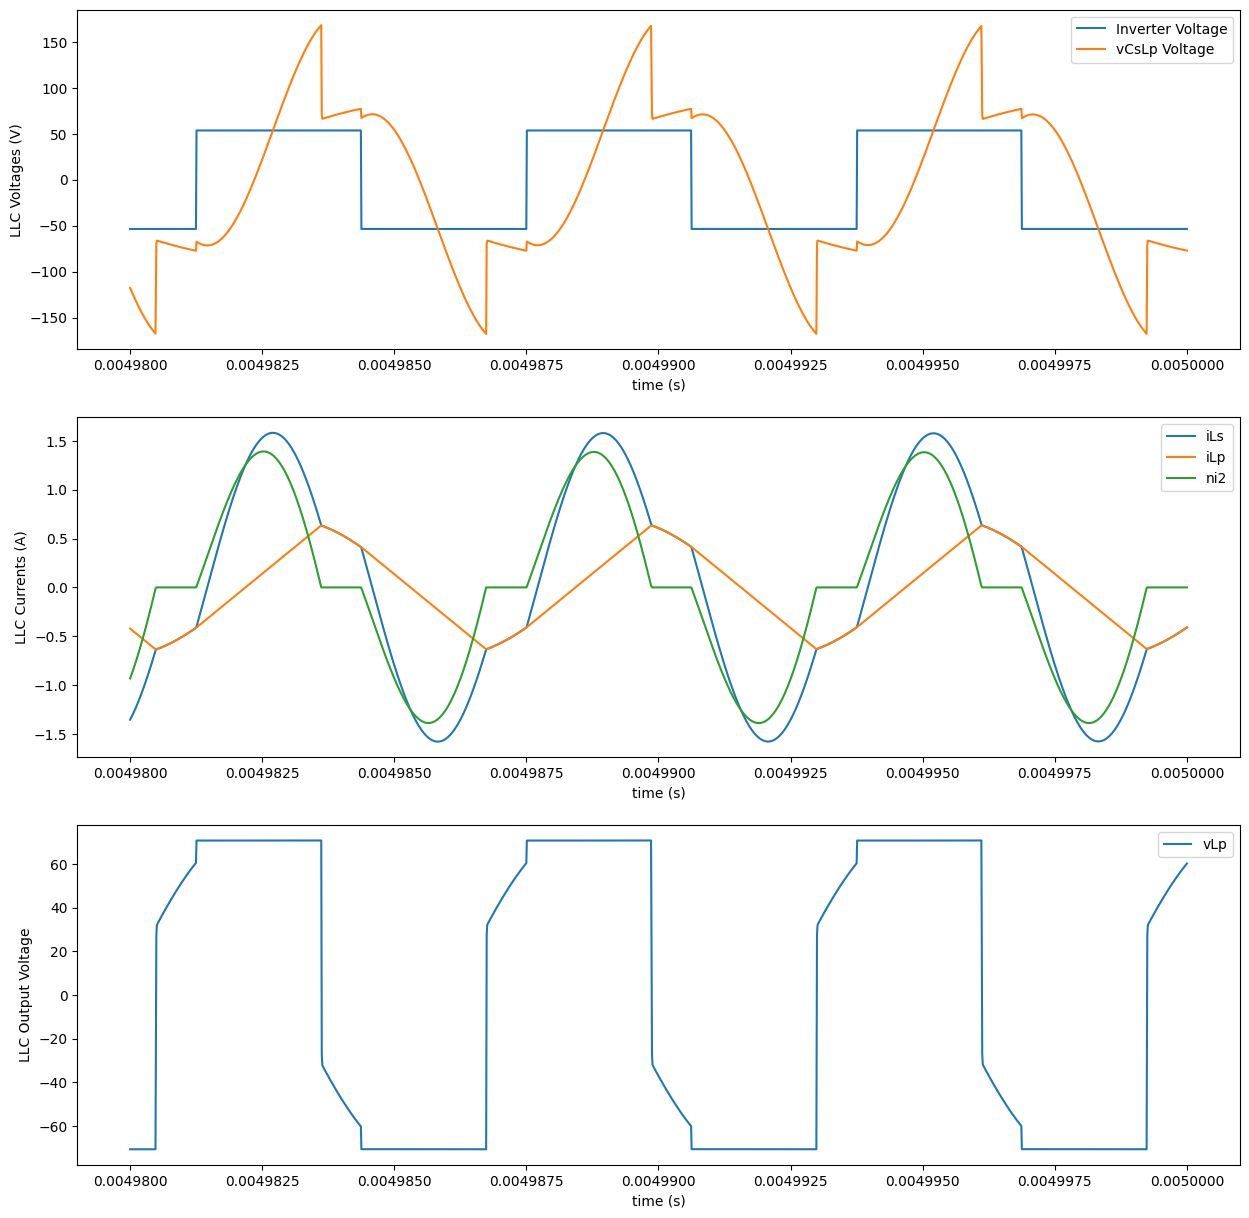

In [8]:
#plot
fig, axs = plt.subplots(3,1,figsize=(15,15))
axs[0].set_ylabel('LLC Voltages (V)')
axs[0].set_xlabel('time (s)')
axs[0].plot(simba_time_0_5ms,simba_vInv, label ='Inverter Voltage')
axs[0].plot(simba_time_0_5ms,simba_vCsLp, label ='vCsLp Voltage')
axs[0].legend(loc='upper right')

axs[1].set_ylabel('LLC Currents (A)')
axs[1].set_xlabel('time (s)')
axs[1].plot(simba_time_0_5ms,simba_iLs, label ='iLs')
axs[1].plot(simba_time_0_5ms,simba_iLp, label ='iLp')
axs[1].plot(simba_time_0_5ms,simba_ni2, label ='ni2')
axs[1].legend(loc='upper right')

axs[2].set_ylabel('LLC Output Voltage')
axs[2].set_xlabel('time (s)')
axs[2].plot(simba_time_0_5ms,simba_vLp, label ='vLp')
axs[2].legend(loc='upper right')

plt.show();

### Output Voltage

In [9]:
#get signals
simba_time = job.TimePoints
simba_vOut = job.GetSignalByName('Cout - Voltage').DataPoints

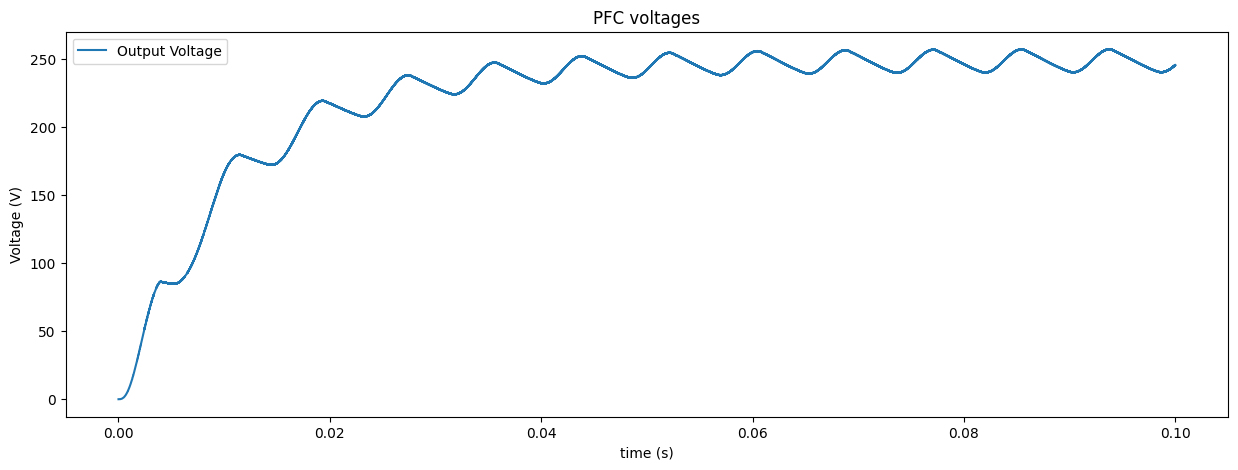

In [10]:
# figure
fig, ax = plt.subplots(figsize=(15,5))
ax.set_title("PFC voltages")
ax.set_ylabel('Voltage (V)')
ax.set_xlabel('time (s)')
ax.plot(simba_time,simba_vOut, label ='Output Voltage')
ax.legend(loc='upper left')
plt.show();